ovid 19 UK Deaths
In this Jupyter notebook, I will be conducting an exploratory data analysis (EDA) on three datasets related to the COVID-19 pandemic in the United Kingdom. The datasets I have chosen are Deaths.csv, Vaccinations.csv, and ConfirmedCasesByDateReported.csv. It's important to note that the 'areaName' column in ConfirmedCasesByDateReported.csv and Deaths.csv only contain 'United Kingdom'. The 'areaName' column in Vaccinations.csv, only contain information for the four countries that make up the United Kingdom. Throughout this analysis, I will be using pandas to manipulate and explore the datasets, and I will also be using visualizations to better understand the data..



In [1916]:
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt
import seaborn as sns

Creating Dataframes

In [1917]:
d = pd.read_csv("data/Deaths.csv") # creates data frame
v = pd.read_csv("data/Vaccinations.csv")
c = pd.read_csv("data/ConfirmedCasesByDateReported.csv")

In [1918]:
d.head()

,areaName,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
0,United Kingdom,10/3/2021,32,125165.0
1,United Kingdom,9/3/2021,97,125133.0
2,United Kingdom,8/3/2021,130,125036.0
3,United Kingdom,7/3/2021,102,124906.0
4,United Kingdom,6/3/2021,128,124804.0


In [1919]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376 entries, 0 to 375
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   areaName                    376 non-null    object 
 1   date                        376 non-null    object 
 2   newDeaths28DaysByDeathDate  376 non-null    int64  
 3   cumDeaths28DaysByDeathDate  374 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 11.9+ KB


There are two missing values in the 'cumDeaths28DaysByDeathDate' column, as the non-null count for this column is 374 instead of 376. It may be necessary to handle these missing values before proceeding with any further analysis.

In [1920]:
d.describe()

,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
count,376.000000,374.000000
mean,332.885638,51317.727273
std,344.537116,32077.730134
min,0.000000,1.000000
25%,31.750000,38706.750000
50%,221.500000,41679.500000
75%,487.750000,63238.500000
max,1359.000000,125165.000000


In [1921]:
# Drop the two rows with null values.
d.dropna(inplace=True)

In [1922]:
v.head()

,areaName,date,weeklyPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,weeklyPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
0,England,14/2/2021,2270123,12844193,17521,487697
1,England,7/2/2021,2398160,10574070,8571,470176
2,England,31/1/2021,2198114,8175910,8466,461605
3,England,24/1/2021,2244887,5977796,6527,453139
4,England,17/1/2021,1608244,3732909,40483,446612


In [1923]:
v.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype 
---  ------                                             --------------  ----- 
 0   areaName                                           40 non-null     object
 1   date                                               40 non-null     object
 2   weeklyPeopleVaccinatedFirstDoseByVaccinationDate   40 non-null     int64 
 3   cumPeopleVaccinatedFirstDoseByVaccinationDate      40 non-null     int64 
 4   weeklyPeopleVaccinatedSecondDoseByVaccinationDate  40 non-null     int64 
 5   cumPeopleVaccinatedSecondDoseByVaccinationDate     40 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.0+ KB


In this case, there are no null values.

In [1924]:
c.head()

,areaName,date,newCasesByPublishDate
0,United Kingdom,25/3/2021,6397
1,United Kingdom,24/3/2021,5605
2,United Kingdom,23/3/2021,5379
3,United Kingdom,22/3/2021,5342
4,United Kingdom,21/3/2021,5312


In [1925]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   areaName               421 non-null    object
 1   date                   421 non-null    object
 2   newCasesByPublishDate  421 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 10.0+ KB


As with vaccinations, there are no null values here.

#Cases and Deaths

In [1926]:
c.reindex(index=c.index[::-1])
d.reindex(index=d.index[::-1])

,areaName,date,newDeaths28DaysByDeathDate,cumDeaths28DaysByDeathDate
373,United Kingdom,2/3/2020,1,1.0
372,United Kingdom,3/3/2020,2,3.0
371,United Kingdom,4/3/2020,0,3.0
370,United Kingdom,5/3/2020,3,6.0
369,United Kingdom,6/3/2020,0,6.0
...,...,...,...,...
4,United Kingdom,6/3/2021,128,124804.0
3,United Kingdom,7/3/2021,102,124906.0
2,United Kingdom,8/3/2021,130,125036.0
1,United Kingdom,9/3/2021,97,125133.0


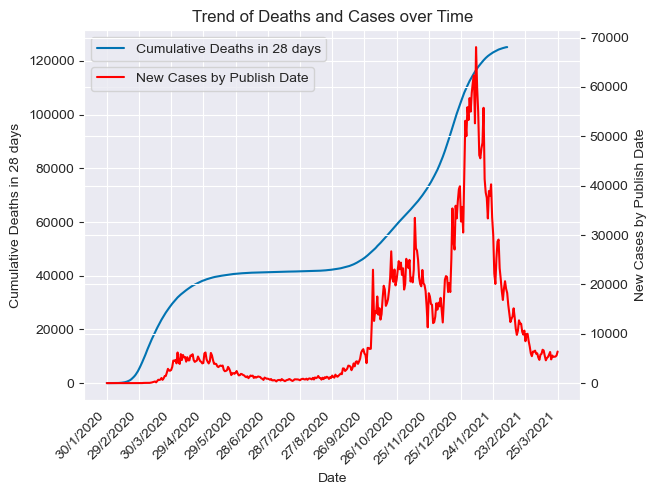

In [1927]:
sns.set_style("darkgrid")

fig, ax1 = plt.subplots()

# plot cumulative deaths on primary axis
sns.lineplot(x="date", y="cumDeaths28DaysByDeathDate", data=d[::-1], ax=ax1, label='Cumulative Deaths in 28 days')
ax1.set_xlabel('Date')
ax1.set_ylabel('Cumulative Deaths in 28 days')
ax1.set_title('Trend of Deaths and Cases over Time')

# add secondary y-axis for new cases
ax2 = ax1.twinx()
sns.lineplot(x="date", y="newCasesByPublishDate", data=c[::-1], ax=ax2, color='red', label='New Cases by Publish Date')
ax2.set_ylabel('New Cases by Publish Date')

xticks = range(0, len(c), 30)
ax1.set_xticks(xticks)
ax1.set_xticklabels([c['date'][i] for i in xticks][::-1], rotation=45, ha='right')

ax1.legend(loc='upper left')
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.92))

plt.show()

To reverse the order of the rows in my dataframes c and d, I use the reindex method. This is because the lineplot function in Seaborn plots the data in the order it appears in the dataframe, which needs to be in the correct chronological order for my use case. Reversing the order of the rows allows me to plot the data in the correct order and visualize the trend over time.

The motivation for combining the cumulative deaths and daily cases in a single chart is to gain a better understanding of the overall trend of the pandemic in terms of its impact on human lives. By plotting the cumulative deaths and daily cases on the same chart, we can easily see how the pandemic has been evolving over time, as well as how different measures taken to control the spread of the virus have affected the number of cases and deaths.

Combining the two metrics in a single chart allows for better comparison of the trends and highlights any correlations between the two metrics.

# Vaccinations

In [1928]:
v.reindex(index=v.index[::-1])

,areaName,date,weeklyPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,weeklyPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate
39,Wales,13/12/2020,8212,8212,0,0
38,Wales,20/12/2020,15693,23905,0,0
37,Wales,27/12/2020,12463,36368,0,0
36,Wales,3/1/2021,14132,50500,26,26
35,Wales,10/1/2021,41368,91868,62,88
34,Wales,17/1/2021,67431,159299,116,204
33,Wales,24/1/2021,125024,284323,398,602
32,Wales,31/1/2021,152275,436598,400,1002
31,Wales,7/2/2021,181595,618193,1923,2925
30,Wales,14/2/2021,170282,788475,2511,5436


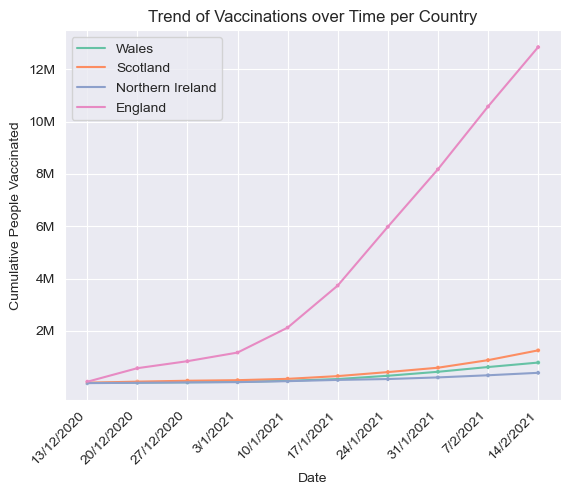

In [1929]:
from matplotlib import ticker

sns.set_style("darkgrid")

fig2, ax = plt.subplots()

sns.lineplot(x="date", y="cumPeopleVaccinatedFirstDoseByVaccinationDate", hue="areaName", data=v[::-1], ax=ax, palette="Set2")
sns.scatterplot(x="date", y="cumPeopleVaccinatedFirstDoseByVaccinationDate", hue="areaName", data=v[::-1], ax=ax, s=10, palette="Set2")

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative People Vaccinated')
ax.set_title('Trend of Vaccinations over Time per Country')
plt.xticks(rotation=45, ha='right')

# Format the y-axis labels as millions
y_ticks = [2000000, 4000000, 6000000, 8000000, 10000000, 12000000]
y_ticklabels = ['2M', '4M', '6M', '8M', '10M', '12M']
ax.yaxis.set_major_locator(ticker.FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_ticklabels))
ax.set_yticks(y_ticks)

# Get handles and labels of the legend
handles, labels = ax.get_legend_handles_labels()
handles = handles[:4]
labels = labels[:4]

# Create a new legend with the selected handles and labels
ax.legend(handles, labels, loc="upper left")

plt.show()

This looks good, but England completely dominates the visualisation. To fix this, I will redo the chart using a logarithmic scale.

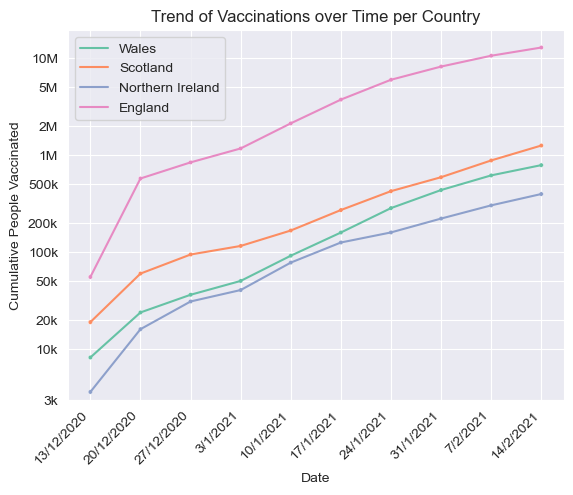

In [1930]:
sns.set_style("darkgrid")

fig3, ax = plt.subplots()

sns.lineplot(x="date", y="cumPeopleVaccinatedFirstDoseByVaccinationDate", hue="areaName", data=v[::-1], ax=ax, palette="Set2")
sns.scatterplot(x="date", y="cumPeopleVaccinatedFirstDoseByVaccinationDate", hue="areaName", data=v[::-1], ax=ax, s=10, palette="Set2")

ax.set_xlabel('Date')
ax.set_ylabel('Cumulative People Vaccinated')
ax.set_title('Trend of Vaccinations over Time per Country')
plt.xticks(rotation=45, ha='right')

# set the scale to logarithmic
plt.yscale("log")

# use the ScalarFormatter to format the y-axis labels
ax.yaxis.set_major_formatter(ticker.ScalarFormatter())

# set the y-axis limits to start from 10,000
ax.set_ylim([3000, ax.get_ylim()[1]])

# manually set y-tick labels
y_ticks = [3000, 10000, 20000, 50000, 100000, 200000, 500000, 1000000, 2000000, 5000000, 10000000]
y_ticklabels = ['3k', '10k', '20k', '50k', '100k', '200k', '500k', '1M', '2M', '5M', '10M']
ax.yaxis.set_major_locator(ticker.FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_ticklabels))
ax.set_yticks(y_ticks)

# get handles and labels of the legend
handles, labels = ax.get_legend_handles_labels()
handles = handles[:4]
labels = labels[:4]

# create a new legend with the selected handles and labels
ax.legend(handles, labels, loc="upper left")

plt.show()

This looks much better, but this doesn't really help us actually understand the effectiveness of the vaccine rollout on a per country basis in the UK, but this can be paired with the population estimates for each country, which are:
<table>
  <tr><th>Country</th><th>Population mid-2021</th></tr>
  <tr><td>England</td><td>56,536,000</td></tr>
  <tr><td>Wales</td><td>3,105,000</td></tr>
  <tr><td>Northern Ireland</td><td>1,905,000</td></tr>
  <tr><td>Scotland</td><td>5,480,000</td></tr>
</table>
Source: https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/bulletins/annualmidyearpopulationestimates/mid2021

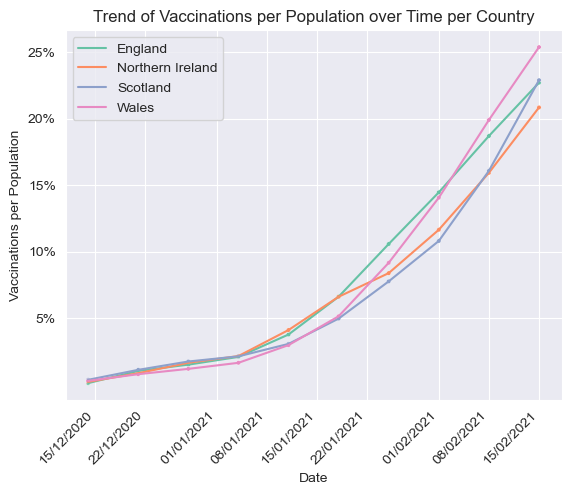

In [1931]:
from matplotlib import dates as mpl_dates

populations = {'England': 56536000, 'Wales': 3105000, 'Northern Ireland': 1905000, 'Scotland': 5480000}

# convert date to datetime
v['date'] = pd.to_datetime(v['date'], format='%d/%m/%Y')

# set index
v.set_index('date', inplace=True)

# calculate vaccinations per population
v['vacc_per_pop'] = v['cumPeopleVaccinatedFirstDoseByVaccinationDate'] / v['areaName'].map(populations)

# reset index
v = v.reset_index()

# group data by week and country
v_grouped = v.groupby([pd.Grouper(key='date', freq='W-MON'), 'areaName'])[['vacc_per_pop']].mean().reset_index()

# plot the data
sns.set_style("darkgrid")

fig4, ax = plt.subplots()

sns.lineplot(x="date", y="vacc_per_pop", hue="areaName", data=v_grouped, ax=ax, palette="Set2")
sns.scatterplot(x="date", y="vacc_per_pop", hue="areaName", data=v_grouped, ax=ax, s=10, palette="Set2")

ax.set_xlabel('Date')
ax.set_ylabel('Vaccinations per Population')
ax.set_title('Trend of Vaccinations per Population over Time per Country')
plt.xticks(rotation=45, ha='right')

date_format = mpl_dates.DateFormatter('%d/%m/%Y')
ax.xaxis.set_major_formatter(date_format)

y_ticks = [0.05, 0.1, 0.15, 0.2, 0.25]
y_ticklabels = ['5%', '10%', '15%', '20%', '25%']
ax.yaxis.set_major_locator(ticker.FixedLocator(y_ticks))
ax.yaxis.set_major_formatter(ticker.FixedFormatter(y_ticklabels))
ax.set_yticks(y_ticks)

handles, labels = ax.get_legend_handles_labels()
handles = handles[:4]
labels = labels[:4]

# create a new legend with the selected handles and labels
ax.legend(handles, labels, loc="upper left")

plt.show()